Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
tax_inc = []
for i in df['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
df['tax_inc'] = tax_inc

In [4]:
df.columns  

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [5]:
df.drop('Taxable.Income', axis = 1, inplace = True)  
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [7]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [8]:
df.isna().sum()   

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_inc            0
dtype: int64

In [9]:
df[df.duplicated()]    

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc


In [10]:
print(df['Undergrad'].value_counts())
print(df['Marital.Status'].value_counts())
print(df['Urban'].value_counts())
print(df['tax_inc'].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_inc, dtype: int64


In [11]:
print(df['Undergrad'].unique())
print(df['Marital.Status'].unique())
print(df['Urban'].unique())
print(df['tax_inc'].unique())

['NO' 'YES']
['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [12]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
df['Undergrad'] = LE.fit_transform(df['Undergrad'])
df['Marital.Status'] = LE.fit_transform(df['Marital.Status'])
df['Urban'] = LE.fit_transform(df['Urban'])
df['tax_inc'] = LE.fit_transform(df['tax_inc'])

In [13]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   tax_inc          600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [14]:
df.corr()  

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_inc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


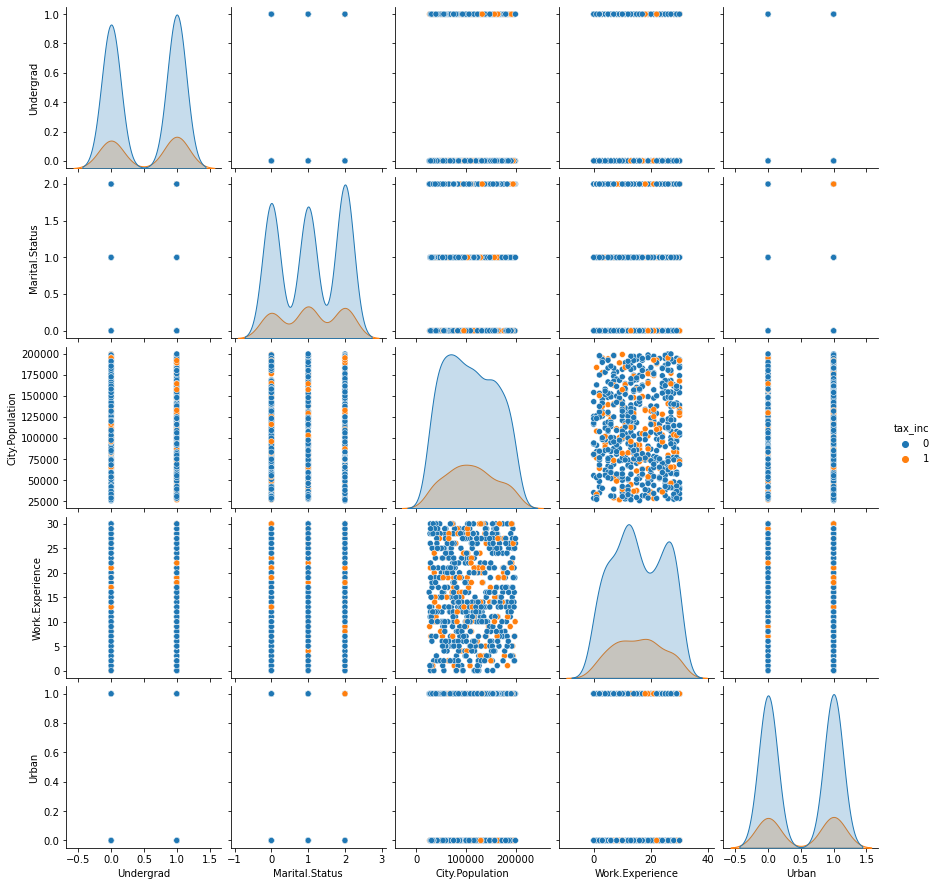

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue = 'tax_inc')
plt.show()

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x)
print(y)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_inc

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 40)

#### Building Decision Tree Classifier Using Entropy Criteria

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

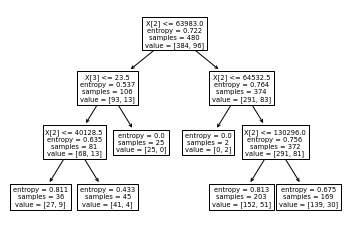

In [20]:
from sklearn import tree
tree.plot_tree(model);

In [21]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [22]:
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [23]:
df['tax_inc'].value_counts()

0    476
1    124
Name: tax_inc, dtype: int64

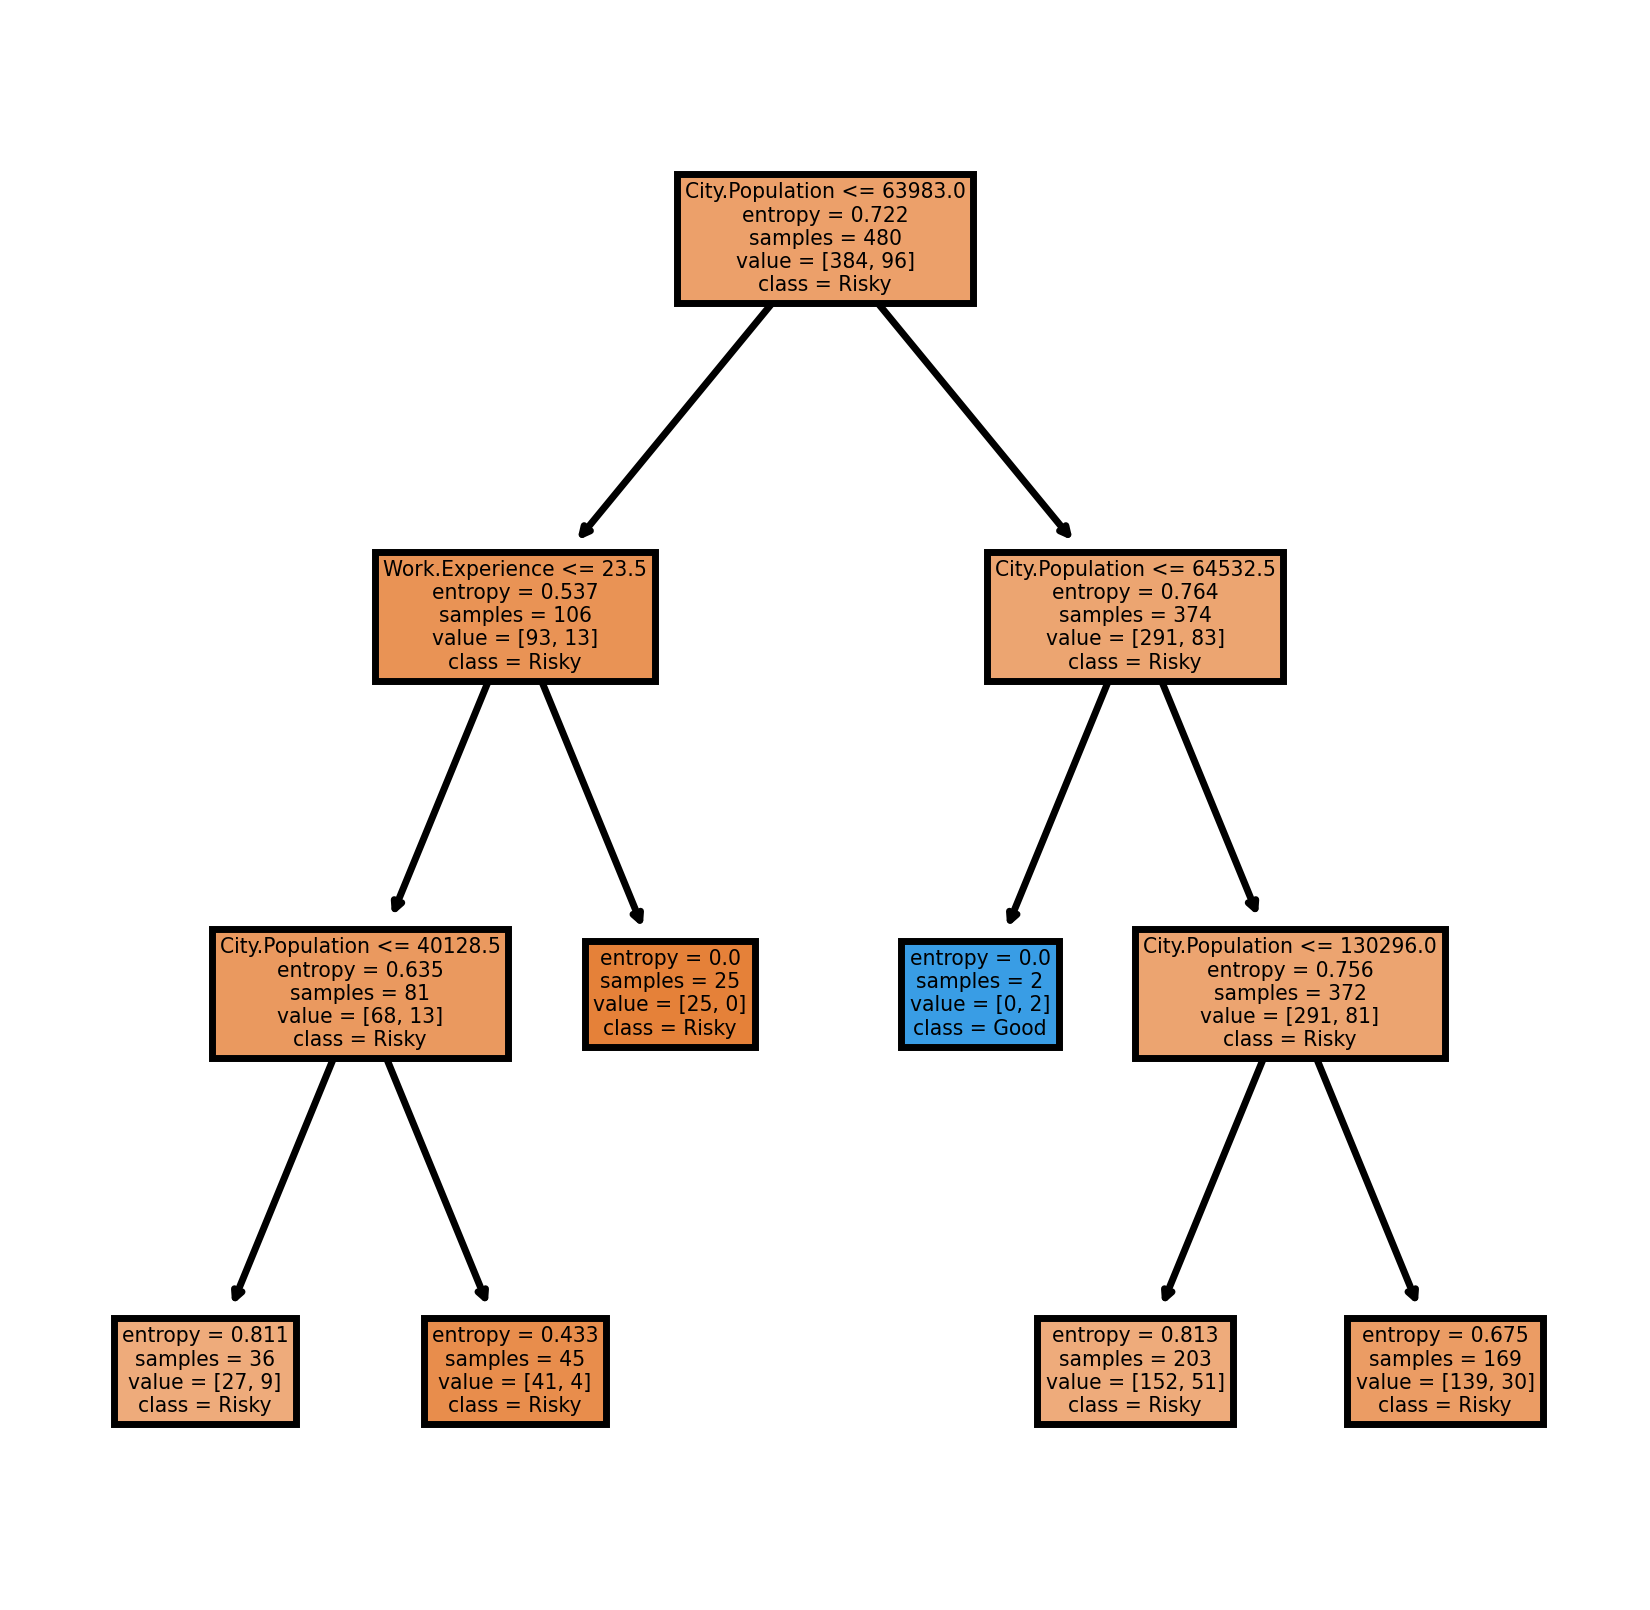

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [25]:
preds = model.predict(x_test)     
pd.Series(preds).value_counts()    

0    120
dtype: int64

In [26]:
y_test.value_counts()

0    92
1    28
Name: tax_inc, dtype: int64

In [27]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7666666666666667

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7666666666666667

### 2. Company Data

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
1. Sales -- Unit sales (in thousands) at each location
2. Competitor Price -- Price charged by competitor at each location
3. Income -- Community income level (in thousands of dollars)
4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)
5. Population -- Population size in region (in thousands)
6. Price -- Price company charges for car seats at each site
7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8. Age -- Average age of the local population
9. Education -- Education level at each location
10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [34]:
Comp = pd.read_csv("Company_Data (1).csv")
Comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [35]:
Comp.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [36]:
Comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [37]:
Comp.corr()   

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [38]:
Comp.isna().sum()  

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [39]:
Comp.mean()

Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [40]:
# to convert continuous variables into categorical variable use for loop, sales<=7.49 = Low, sales>7.49 = High
sales_val = []
for value in Comp["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
Comp["sales_val"]=sales_val

In [41]:
Comp['sales_val']

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [42]:
Comp.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

In [43]:
Comp.drop('Sales', axis = 1, inplace = True)

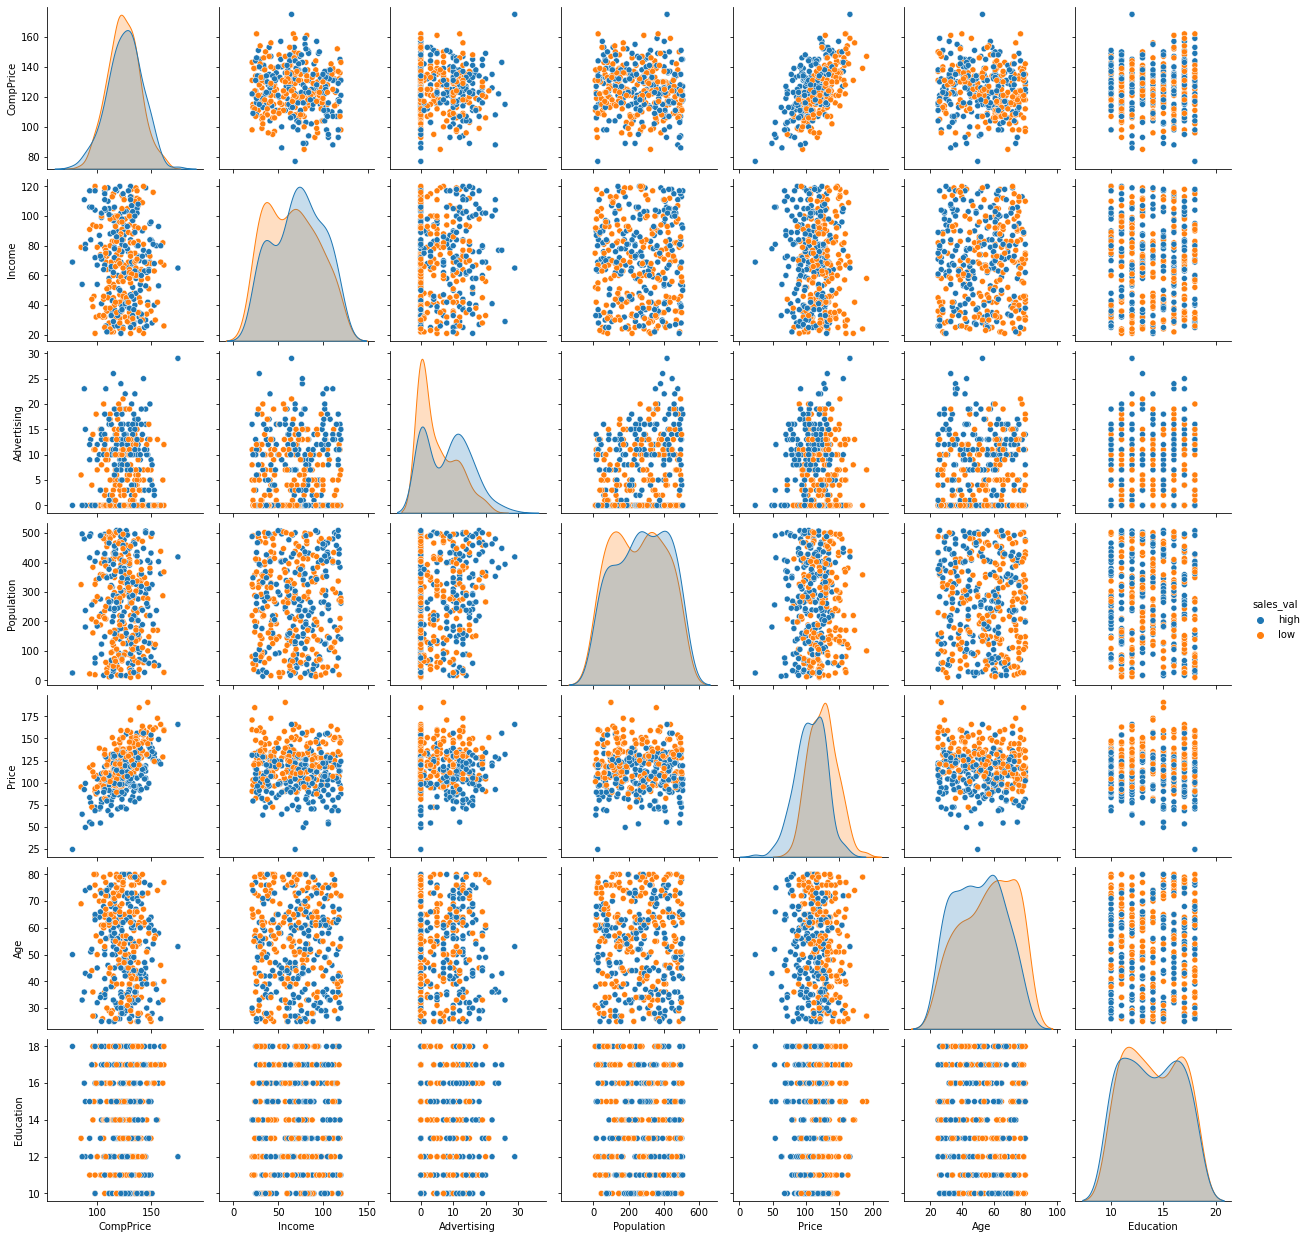

In [44]:
sns.pairplot(data= Comp, hue = 'sales_val' )
plt.show()

In [45]:
print(Comp['US'].unique())
print(Comp['ShelveLoc'].unique())
print(Comp['Urban'].unique())
print(Comp['sales_val'].unique())

['Yes' 'No']
['Bad' 'Good' 'Medium']
['Yes' 'No']
['high' 'low']


In [46]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Comp['US'] = LE.fit_transform(Comp['US'])
Comp['ShelveLoc'] = LE.fit_transform(Comp['ShelveLoc'])
Comp['Urban'] = LE.fit_transform(Comp['Urban'])
Comp['sales_val'] = LE.fit_transform(Comp['sales_val'])

In [47]:
print(Comp['US'].value_counts())
print(Comp['ShelveLoc'].value_counts())
print(Comp['Urban'].value_counts())
print(Comp['sales_val'].value_counts())

1    258
0    142
Name: US, dtype: int64
2    219
0     96
1     85
Name: ShelveLoc, dtype: int64
1    282
0    118
Name: Urban, dtype: int64
1    201
0    199
Name: sales_val, dtype: int64


In [48]:
Comp.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

In [49]:
x = Comp.iloc[:,:-1]
y = Comp.iloc[:,-1]

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

#### Building Decision Tree Classifier Using Entropy Criteria

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [52]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

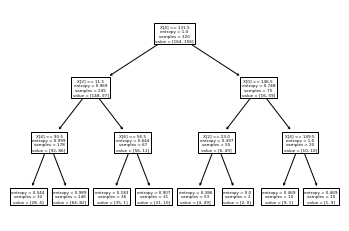

In [53]:
from sklearn import tree
tree.plot_tree(model);

In [54]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

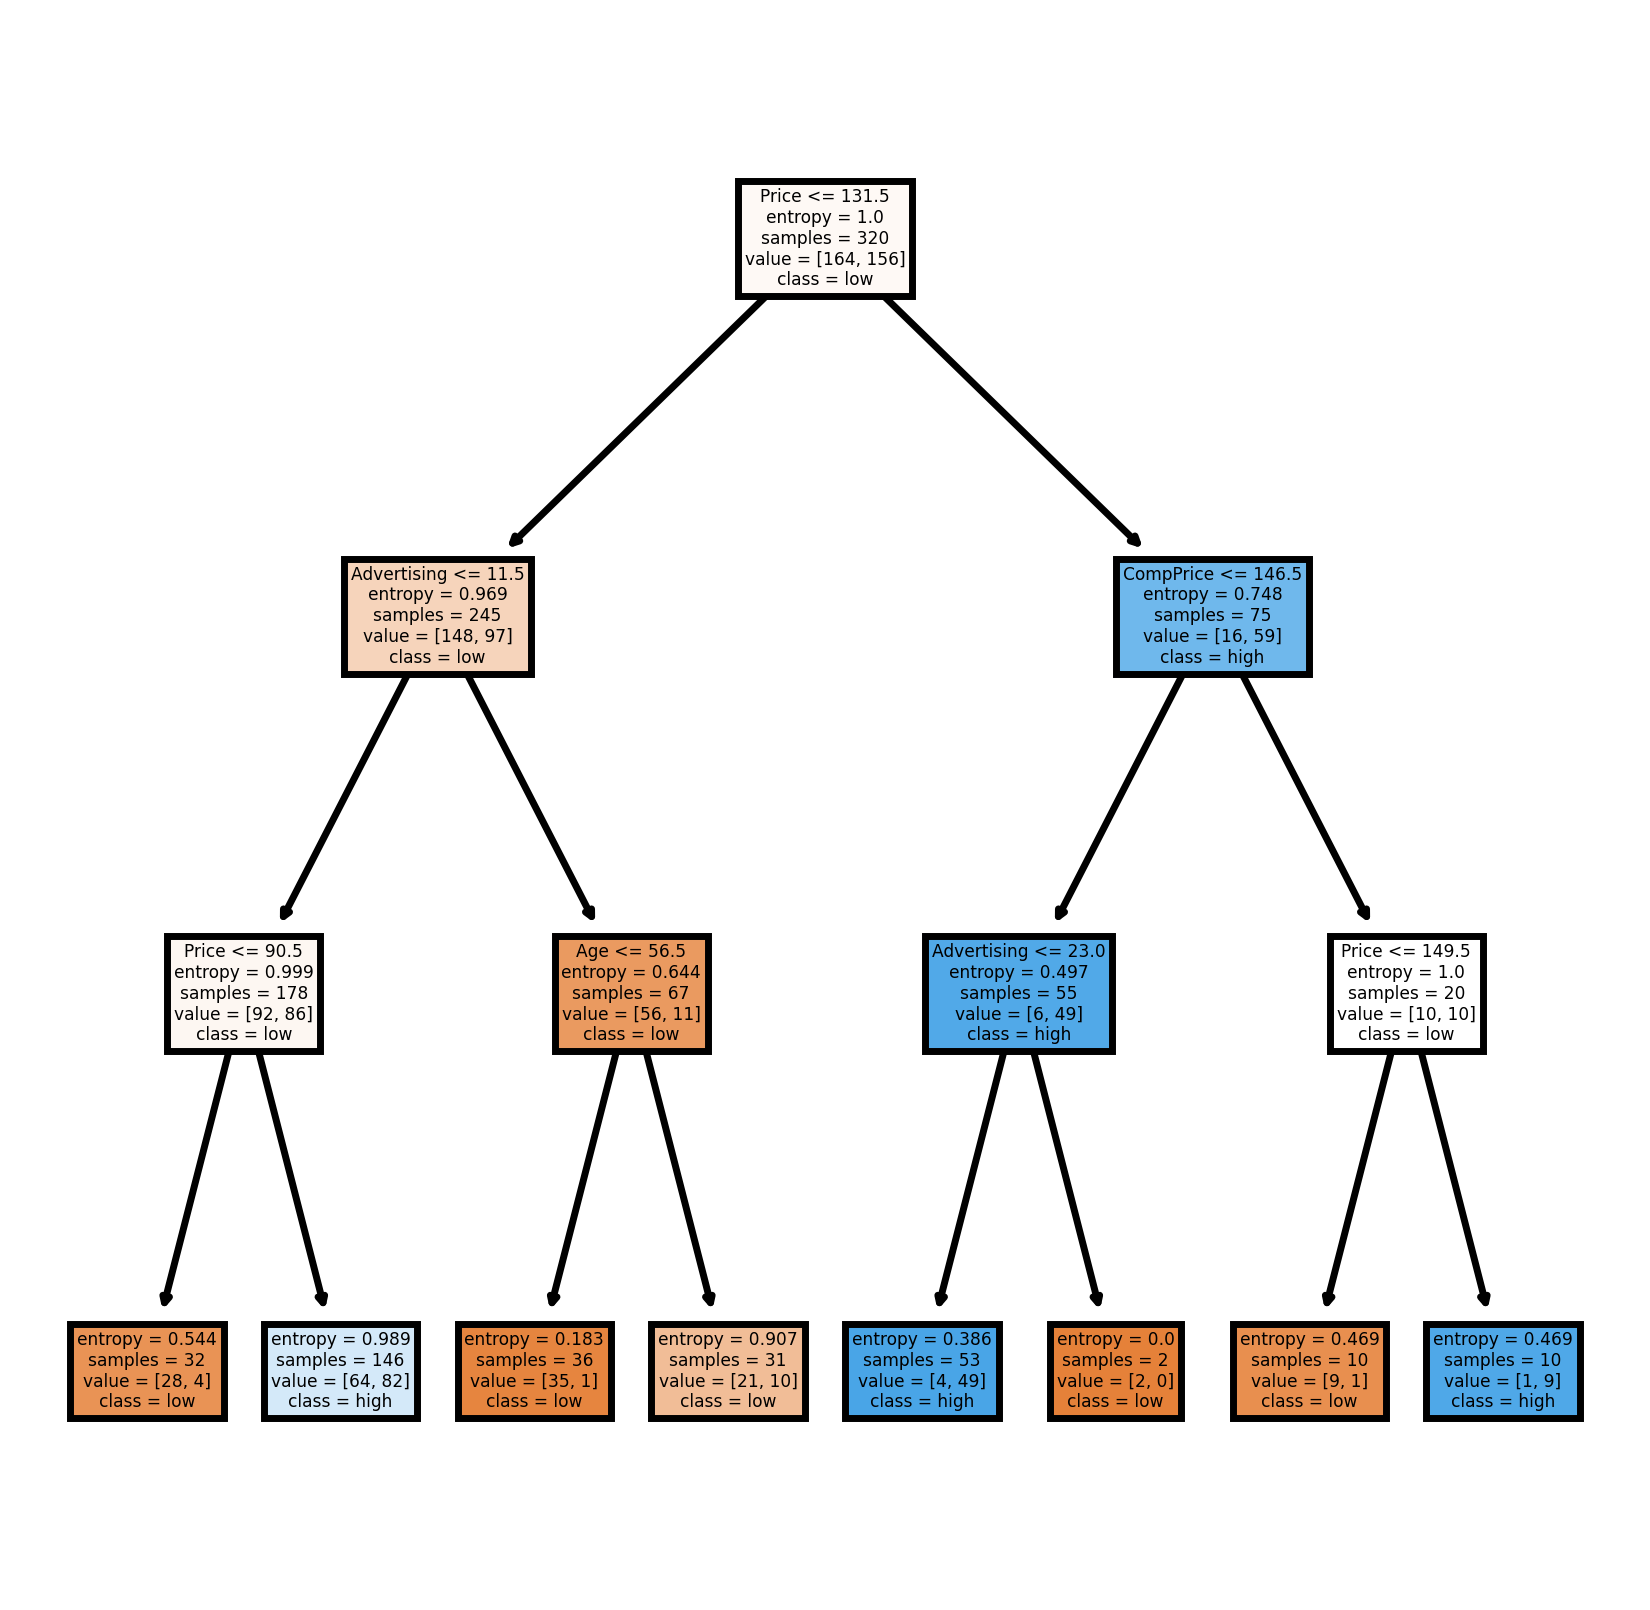

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']   # Columns
cn = ['low', 'high']   # value_counts.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [56]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()   

1    56
0    24
dtype: int64

In [57]:
y_test.value_counts()

1    45
0    35
Name: sales_val, dtype: int64

In [58]:
preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [59]:
pd.crosstab(y_test, preds)  

col_0,0,1
sales_val,,
0,17,18
1,7,38


In [60]:
preds, y_test

(array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]),
 132    0
 390    1
 310    0
 3      1
 248    1
       ..
 361    0
 197    1
 23     1
 54     1
 58     1
 Name: sales_val, Length: 80, dtype: int32)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.6875

#### Building Decision tree Classifier (CART) using Gini Criteria

In [62]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.6875